In [1]:
# GOOGLE PLAY STORE STATS
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
location='datasets/googleplaystore.csv'
df=pd.read_csv(location, index_col="Last Updated", parse_dates=True)

In [20]:
df.corr()

,Rating
Rating,1.0


In [23]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
"January 7, 2018",Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
"January 15, 2018",Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
"August 1, 2018","U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
"June 8, 2018",Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
"June 20, 2018",Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [26]:
df.drop(['Android Ver', 'Current Ver', 'Size'], axis=1, inplace=True)


In [31]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
Last Updated,,,,,,,,,
"January 7, 2018",Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
"January 15, 2018",Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
"August 1, 2018","U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
"June 8, 2018",Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
"June 20, 2018",Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [79]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [34]:
df['Rating'] = df['Rating'].astype(float)

In [36]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$'))

In [42]:
df.drop(df[(df['Price'] == 'Everyone')].index, inplace=True)

In [43]:
df['Price'] = df['Price'].astype(float)

In [45]:
df['Reviews'] = df['Reviews'].astype(int)

In [78]:
#df['Installs'] = df['Installs'].map(lambda x: x.strip(','))
df['Installs'] = df['Installs'].astype(str)
#df['Installs'] = df['Installs'].replace(',', '')


In [72]:
installs_list = df['Installs'].values

In [73]:
installs_list

array(['10,000', '500,000', '5,000,000', ..., '1,000', '1,000',
       '10,000,000'], dtype=object)

In [67]:
for value in installs_list:
    value.replace(',', '')

In [68]:
installs_list

array(['10,000', '500,000', '5,000,000', ..., '1,000', '1,000',
       '10,000,000'], dtype=object)

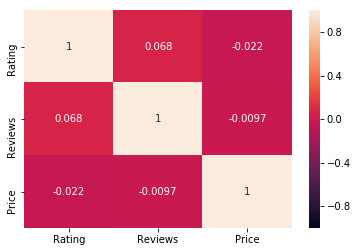

In [80]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)